In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Dense, Dropout , Flatten
from keras import backend as K

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

x_train:  (50000, 32, 32, 3)


In [4]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10    #32 x 32 x 3
# Din = 784 # MINIST


# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

print('y_train: ', y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
print('y_train: ', y_train.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train:  (50000, 1)
y_train:  (50000, 10)


In [5]:
model = Sequential()

#First Conv2D layer
model.add(Conv2D(filters=32 , kernel_size=(3,3) , activation = 'relu' , input_shape = (32,32,3) ))
model.add(MaxPooling2D(pool_size= (2,2) ))

model.add(Conv2D(64, kernel_size = (3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(64 , kernel_size = (3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Flatten())
model.add(Dense(64 , activation = 'relu'))

model.add(Dense(10 , activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [6]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train, epochs=50 , batch_size=50, validation_data=(x_test, y_test))

Epoch 1/50
1000/1000 [==============================] - 47s 46ms/step - loss: 1.9073 - accuracy: 0.2982 - val_loss: 1.3324 - val_accuracy: 0.5157
Epoch 2/50
1000/1000 [==============================] - 44s 44ms/step - loss: 1.2814 - accuracy: 0.5382 - val_loss: 1.1136 - val_accuracy: 0.6068
Epoch 3/50
1000/1000 [==============================] - 44s 44ms/step - loss: 1.0756 - accuracy: 0.6206 - val_loss: 1.0340 - val_accuracy: 0.6413
Epoch 4/50
1000/1000 [==============================] - 44s 44ms/step - loss: 0.9366 - accuracy: 0.6701 - val_loss: 0.9274 - val_accuracy: 0.6798
Epoch 5/50
1000/1000 [==============================] - 39s 39ms/step - loss: 0.8402 - accuracy: 0.7090 - val_loss: 0.9266 - val_accuracy: 0.6884
Epoch 6/50
1000/1000 [==============================] - 39s 39ms/step - loss: 0.7560 - accuracy: 0.7361 - val_loss: 0.8837 - val_accuracy: 0.6956
Epoch 7/50
1000/1000 [==============================] - 39s 39ms/step - loss: 0.7012 - accuracy: 0.7561 - val_loss: 0.8989 -

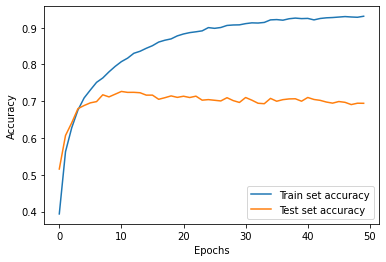

In [9]:
#loss
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='Train set accuracy')
ax.plot(history.history['val_accuracy'], label = 'Test set accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

Text(0, 0.5, 'Loss')

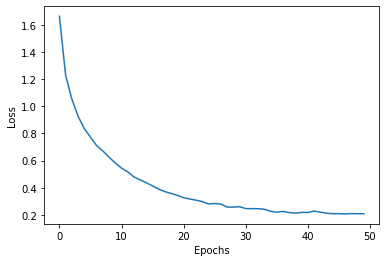

In [10]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')